# Package installation

In [1]:
devtools::document()
devtools::load_all()
library(tAge)

ℹ Updating tAge documentation
ℹ Loading tAge
ℹ Loading tAge


# Loading RNA-seq data

In [2]:
exprs_data <- load_example_expression_data()
head(exprs_data)

,Klo93K,Klo94K,Klo95K,Klo96K,Klo99K,Klo100K,Klo113K,Klo114K,Klo115K,Klo119K,⋯,RNA_95M,RNA_96M,RNA_99M,RNA_100M,RNA_113M,RNA_114M,RNA_115M,RNA_119M,RNA_120M,RNA_122M
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000104478,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,2,4,0,0
ENSMUSG00000104385,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000086053,0,0,0,0,0,0,0,0,0,0,⋯,10,1,18,0,3,2,0,7,4,0
ENSMUSG00000101231,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102135,0,2,6,4,2,0,2,6,4,4,⋯,2,4,0,0,2,6,2,2,4,2
ENSMUSG00000103282,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
metadata <- load_example_metadata()
head(metadata)

,Mouse.ID,Genotype,Sex,Tissue
,<int>,<chr>,<chr>,<chr>
Klo93K,93,WT,Male,Kidney
Klo94K,94,WT,Male,Kidney
Klo95K,95,WT,Male,Kidney
Klo96K,96,WT,Male,Kidney
Klo99K,99,WT,Male,Kidney
Klo100K,100,WT,Male,Kidney


# Create ExpressionSet object

✓ ExpressionSet created successfully
  - Number of genes: 57010 
  - Number of samples: 24 


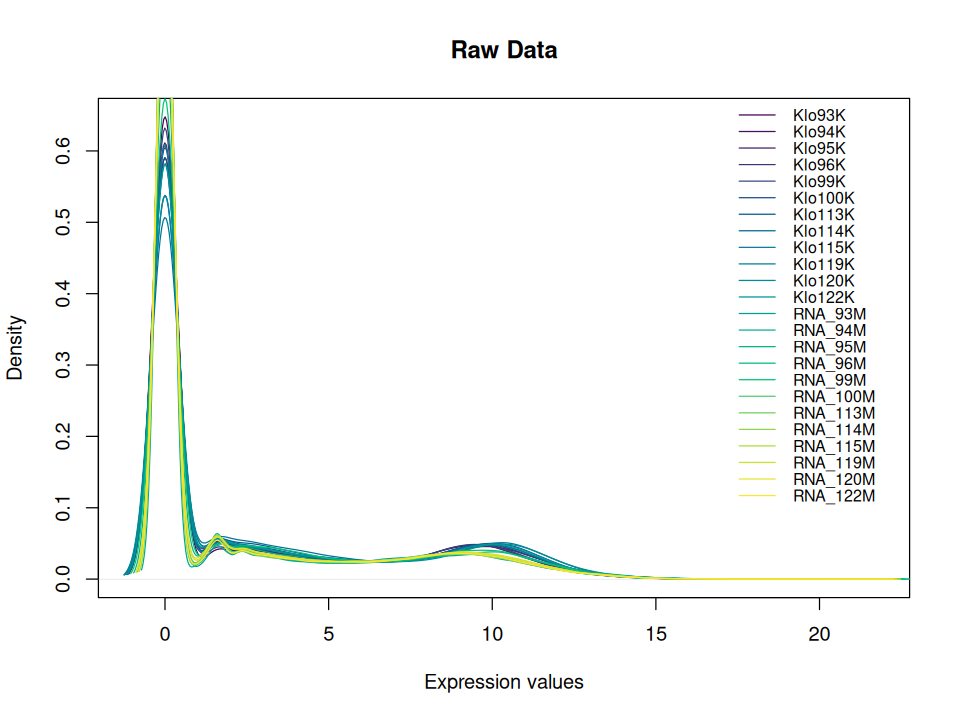

In [4]:
eset <- make_ExpressionSet(exprs_data, metadata, verbose = TRUE)

# Preprocessing and normalization

✓ Gene filtering completed
  - Number of genes before filtering: 57010 
  - Number of genes after filtering: 17200 
  - Percentage of genes retained: 30.2 %


Loading required package: limma



✓ RLE normalization completed


✓ Log transformation completed


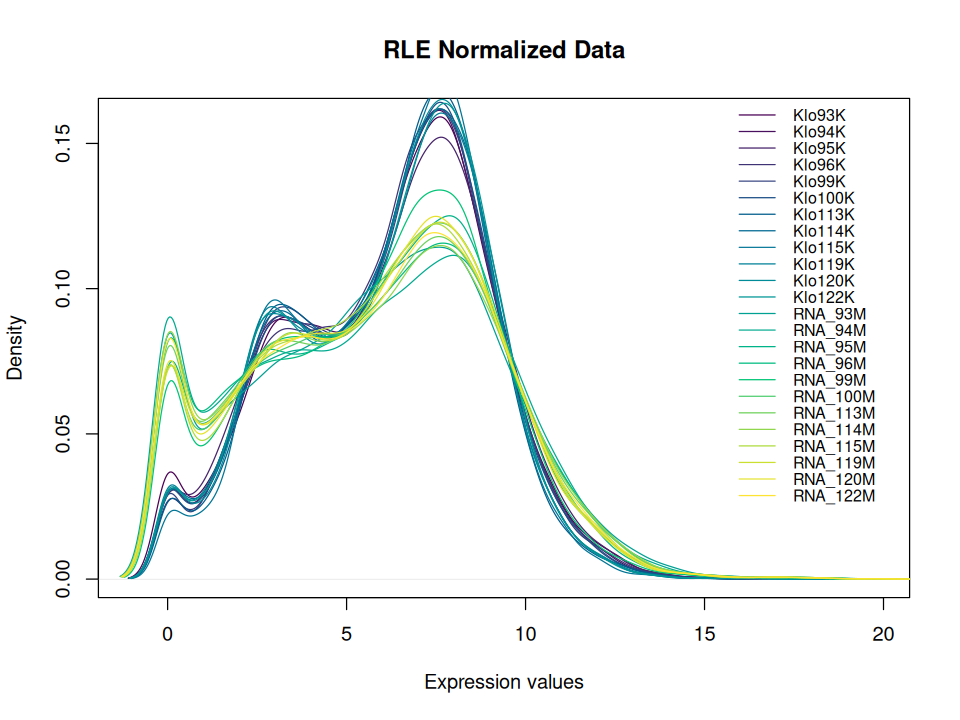

✓ Scaling completed


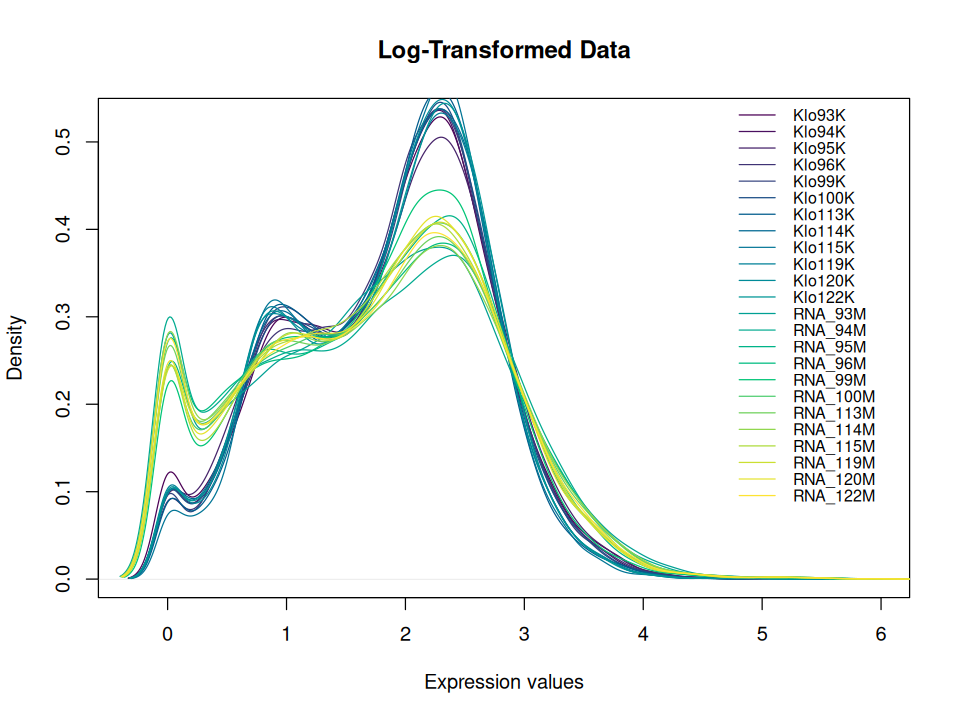

✓ Control samples found for label 'WT'. Using control group median for subtraction.


Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NaNs produced”


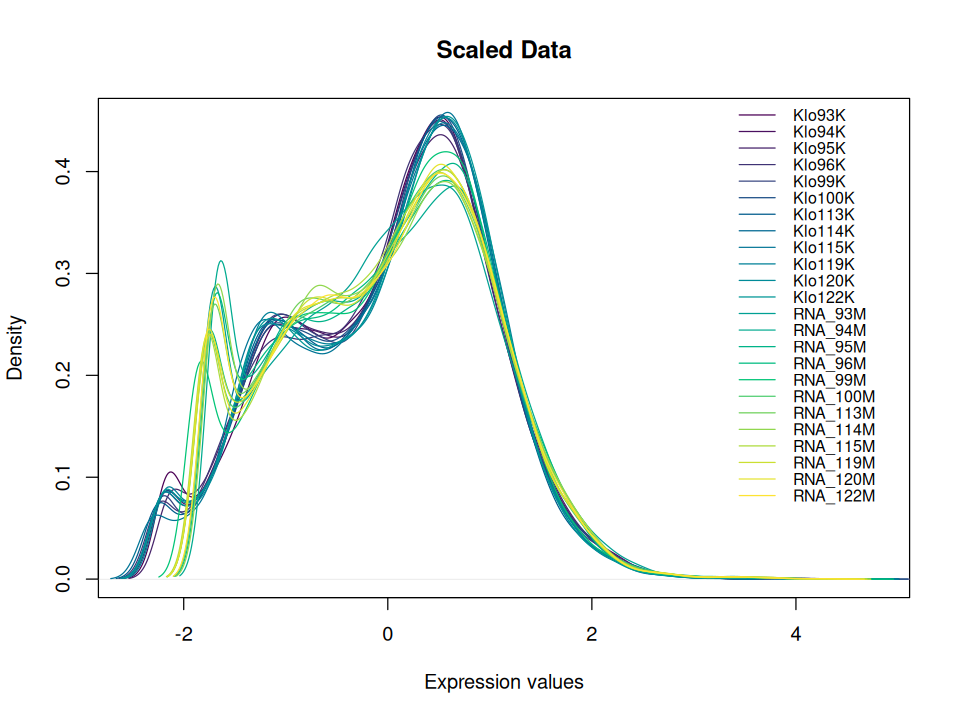

✓ YuGene normalization completed


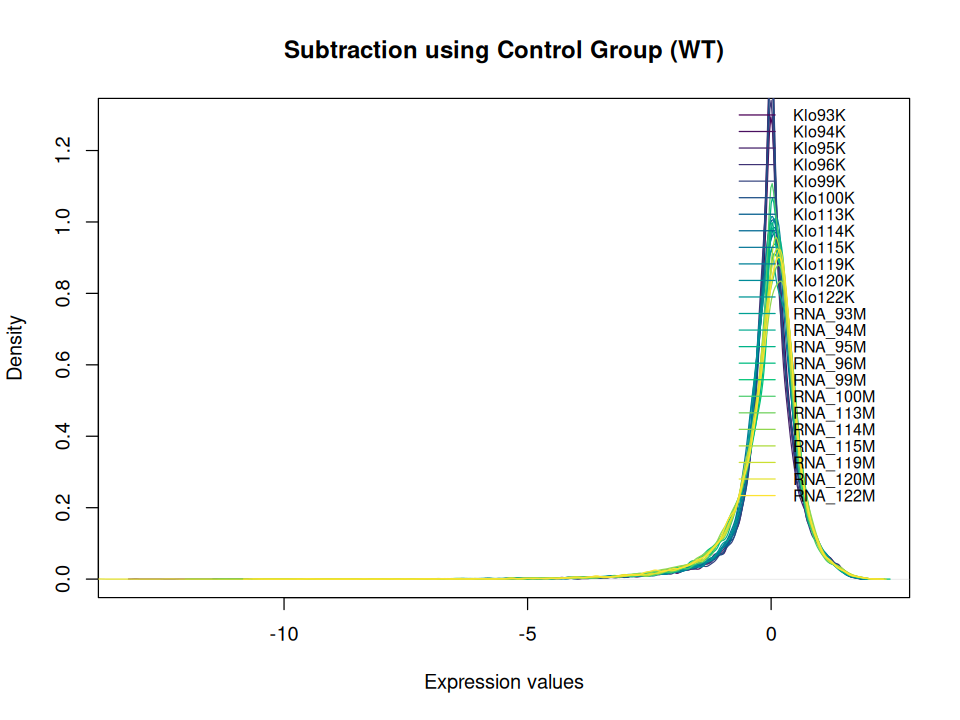

✓ Control samples found for label 'WT'. Using control group median for subtraction.


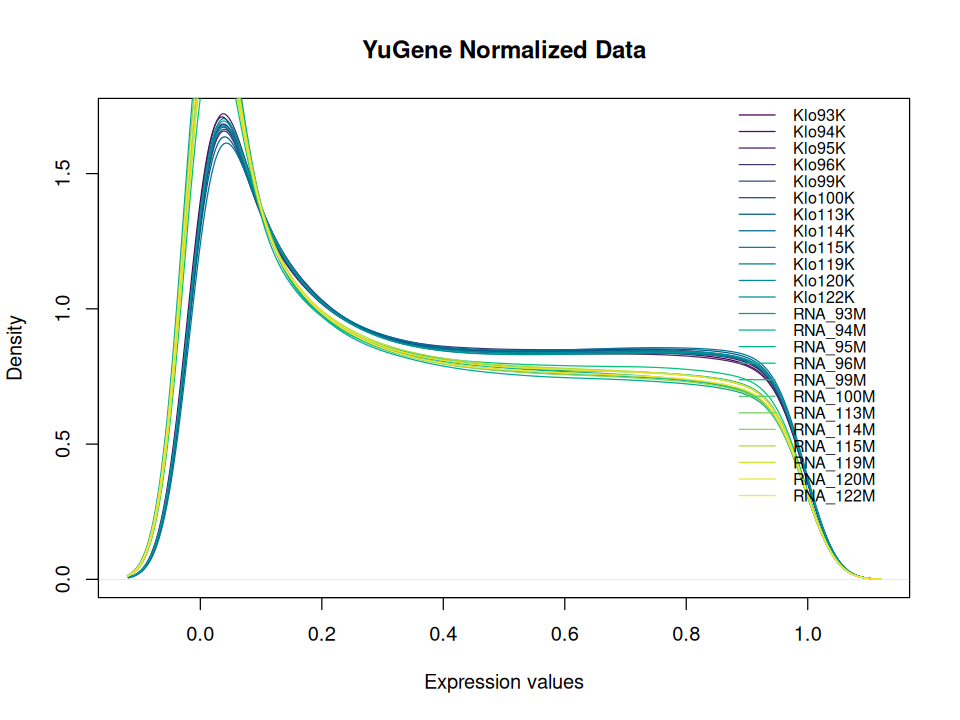

Converting gene IDs...
Auto-detected input type: ensembl 
Converting 17200 genes from ensembl to entrez for mouse 
✓ Conversion completed
  - Successfully converted: 15005 genes
  - Failed to convert: 2195 genes
  - Available genes: 15005 
  - Coverage: 80.3 %
  - First genes in the list: 100009600, 100012, 100017, 100019, 100034251, 100034748 
  - Common genes in dataset: 14410 
  - Coverage of gene_list: 77.1 %
  - Adding 4286 missing genes with NA expressions
Converting gene IDs...
Auto-detected input type: ensembl 
Converting 17200 genes from ensembl to entrez for mouse 
✓ Conversion completed
  - Successfully converted: 15005 genes
  - Failed to convert: 2195 genes
  - Available genes: 15005 
  - Coverage: 80.3 %
  - First genes in the list: 100009600, 100012, 100017, 100019, 100034251, 100034748 
  - Common genes in dataset: 14410 
  - Coverage of gene_list: 77.1 %
  - Adding 4286 missing genes with NA expressions
Converting gene IDs...
Auto-detected input type: ensembl 
Converti

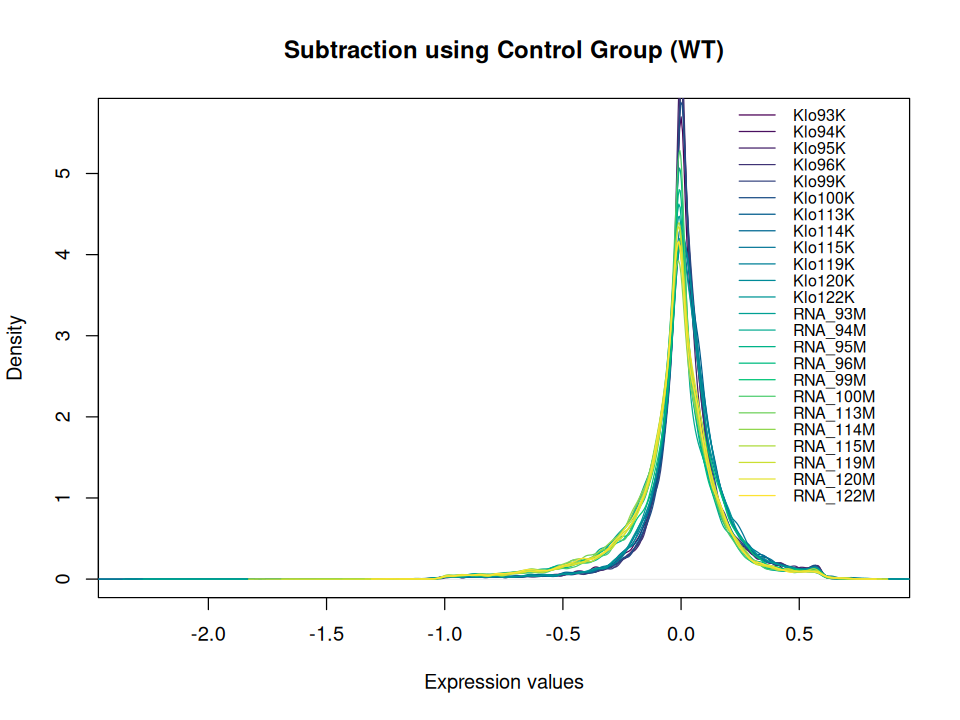

In [5]:
gene_list <- load_gene_list()
tAge_eset <- tAge_preprocessing(
  eset = eset,
  gene_list = gene_list,
  control_group_column = "Genotype",
  control_group_label = "WT",
  verbose = TRUE,
  count_threshold = 20,
  percent_threshold = 20
)

In [6]:
tAge_eset

$RLE_normalized
ExpressionSet (storageMode: lockedEnvironment)
assayData: 17200 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: Klo93K Klo94K ... RNA_122M (24 total)
  varLabels: Mouse.ID Genotype Sex Tissue
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

$log_transformed
ExpressionSet (storageMode: lockedEnvironment)
assayData: 17200 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: Klo93K Klo94K ... RNA_122M (24 total)
  varLabels: Mouse.ID Genotype Sex Tissue
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

$scaled
ExpressionSet (storageMode: lockedEnvironment)
assayData: 18696 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: Klo93K Klo94K ... RNA_122M (24 total)
  varLabels: Mouse.ID Genotype Sex Tissue
  varMetadata: labelDescription
featu

# tAge prediction

In [7]:
model_paths <- list(
    scaled_diff = "/Entropy/Projects/pipeage/clocks/EN differential models 4.6/EN_Chronoage_Mouse_All_WT_scaleddiff.pkl",
    yugene_diff = "/Entropy/Projects/pipeage/clocks/EN differential models 4.6/EN_Chronoage_Mouse_All_WT_yugenediff.pkl"
)

In [10]:
# You should create your own .venv file with 'joblib', 'pandas' and 'scikit-learn' installed.
# Sys.setenv(RETICULATE_PYTHON = "/path/to/your/.venv/bin/python")
Sys.setenv(RETICULATE_PYTHON = "./.venv/bin/python")

In [11]:
results <- predict_tAge(
  tAge_eset,
  model_paths = model_paths,
  species = "mouse",
  mode = "EN"
)

In [12]:
results

,Mouse.ID,Genotype,Sex,Tissue,scaled_diff_EN_tAge,yugene_diff_EN_tAge
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Klo93K,93,WT,Male,Kidney,-1.1906700,-0.43575982
Klo94K,94,WT,Male,Kidney,0.3960813,0.09714799
Klo95K,95,WT,Male,Kidney,-0.4133732,-1.37166025
Klo96K,96,WT,Male,Kidney,2.9001817,1.97836312
Klo99K,99,WT,Male,Kidney,-0.5991792,-4.59616963
Klo100K,100,WT,Male,Kidney,1.4155481,-0.72320759
Klo113K,113,Klotho KO,Male,Kidney,8.9574000,8.84266435
Klo114K,114,Klotho KO,Male,Kidney,13.9249001,12.18872388
Klo115K,115,Klotho KO,Male,Kidney,7.6586017,5.38432382


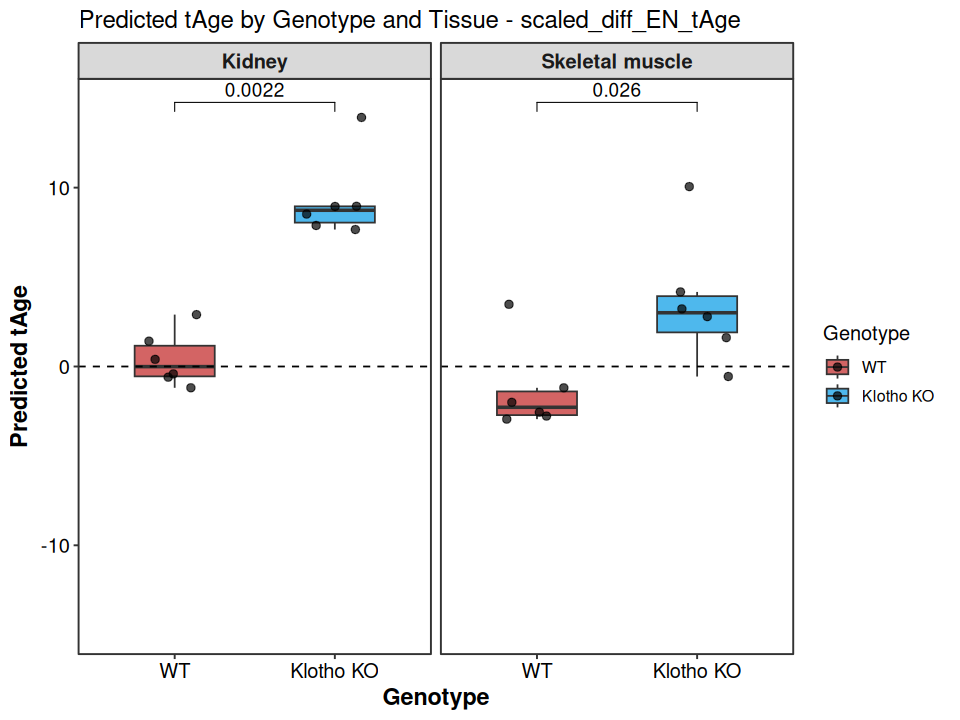

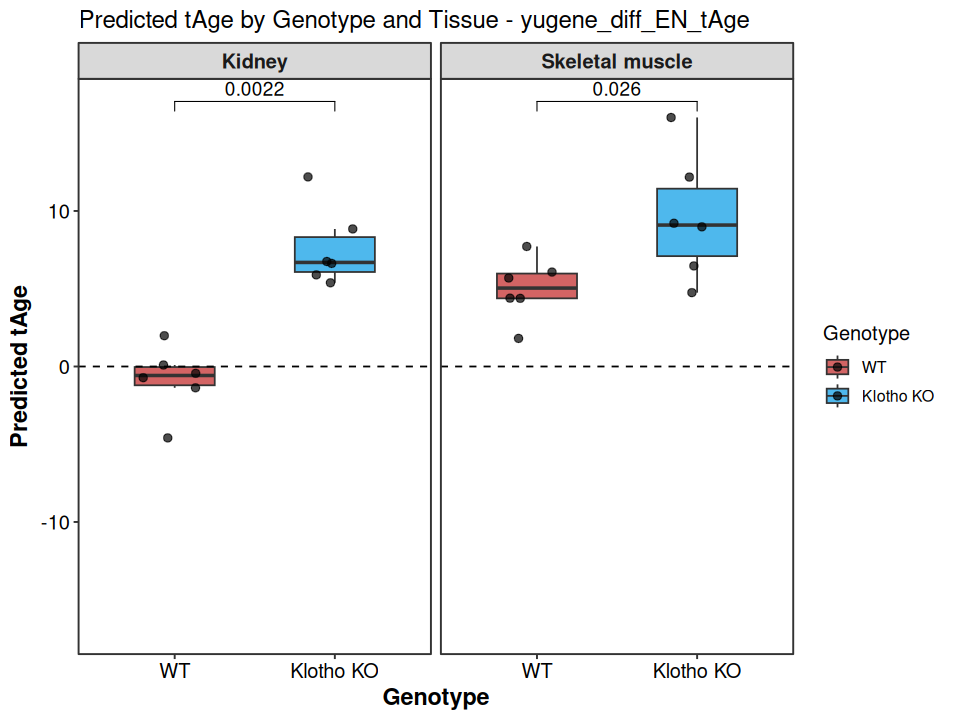

In [13]:
# Show boxplots for each processed eset version
tAge_cols <- c("scaled_diff_EN_tAge", "yugene_diff_EN_tAge")

for (col in tAge_cols) {
  p <- tage_boxplot(
    results, 
    x_var = "Genotype",
    y_var = col, 
    subgroup_var = "Tissue",
    stat_method = "wilcox.test",
    theme_type = "bw",
    title = paste("Predicted tAge by Genotype and Tissue -", col),
    xlab = "Genotype",
    ylab = "Predicted tAge",
    y_center = 0,
    p_label = "p.format",
    colors = c("WT" = "#d36464", "Klotho KO" = "#4eb8ed"),
    x_order = c("WT", "Klotho KO")
  )
  print(p)
}

# Example of map_to_orthologs function usage

In [ ]:
genes <- Biobase::featureNames(eset_coll)[1:100]
map_to_orthologs(gene_ids = genes, species_from = "mmusculus_gene_ensembl", species_to = "mmusculus_gene_ensembl", id_type = "entrezgene_id")

From_ID,From_Name,To_ID,To_Name
<int>,<chr>,<int>,<chr>
100009600,Zglp1,100009600,Zglp1
100012,Oog3,100012,Oog3
100017,Ldlrap1,100017,Ldlrap1
100019,Mdn1,100019,Mdn1
100034251,Wfdc17,100034251,Wfdc17
100034748,Prr35,100034748,Prr35
100036521,Umad1,100036521,Umad1
100036523,Gm16982,100036523,Gm16982
100036768,Gm11696,100036768,Gm11696
